# What is a Generative Model?

Generative models are a class of machine learning models that learn to generate new data points that resemble the training data. Instead of merely classifying or predicting, these models model the underlying data distribution and aim to create new samples from it. Generative models are often used in tasks such as image synthesis, text generation, style transfer, and more.

## Some types of Generative Models include:
1. Autoencoders
2. Generative Adversarial Networks (GANs)
3. Flow-Based Models
4. Diffusion Models



# 1. Autoencoders

The auto-encoder is a complicated mathematical model that trains on unlabeled and unclassified data and is used to map the input data to another compressed feature representation before reconstructing the input data from that feature representation.

The aim of an autoencoder is to learn a lower-dimensional representation (encoding) for a higher-dimensional data, typically for dimensionality reduction, by training the network to capture the most important parts of the input image.


Autoencoders are made up of four major components:

  - Encoder: The model learns how to compress the input data into an encoded form by reducing the input dimensions.
  - Bottleneck: The layer that includes the compressed representation of the input data is known as the bottleneck. This is the smallest input data dimension imaginable.
  - Decoder: When a model learns how to reconstruct data from an encoded representation as close as feasible to the original input, it is called a decoder.
  - Reconstruction Loss: This is a method for determining how well a decoder works and how close the output is to the original input.


  Reading: https://medium.com/@divakar1591/autoencoders-6fab1a9a9f9c

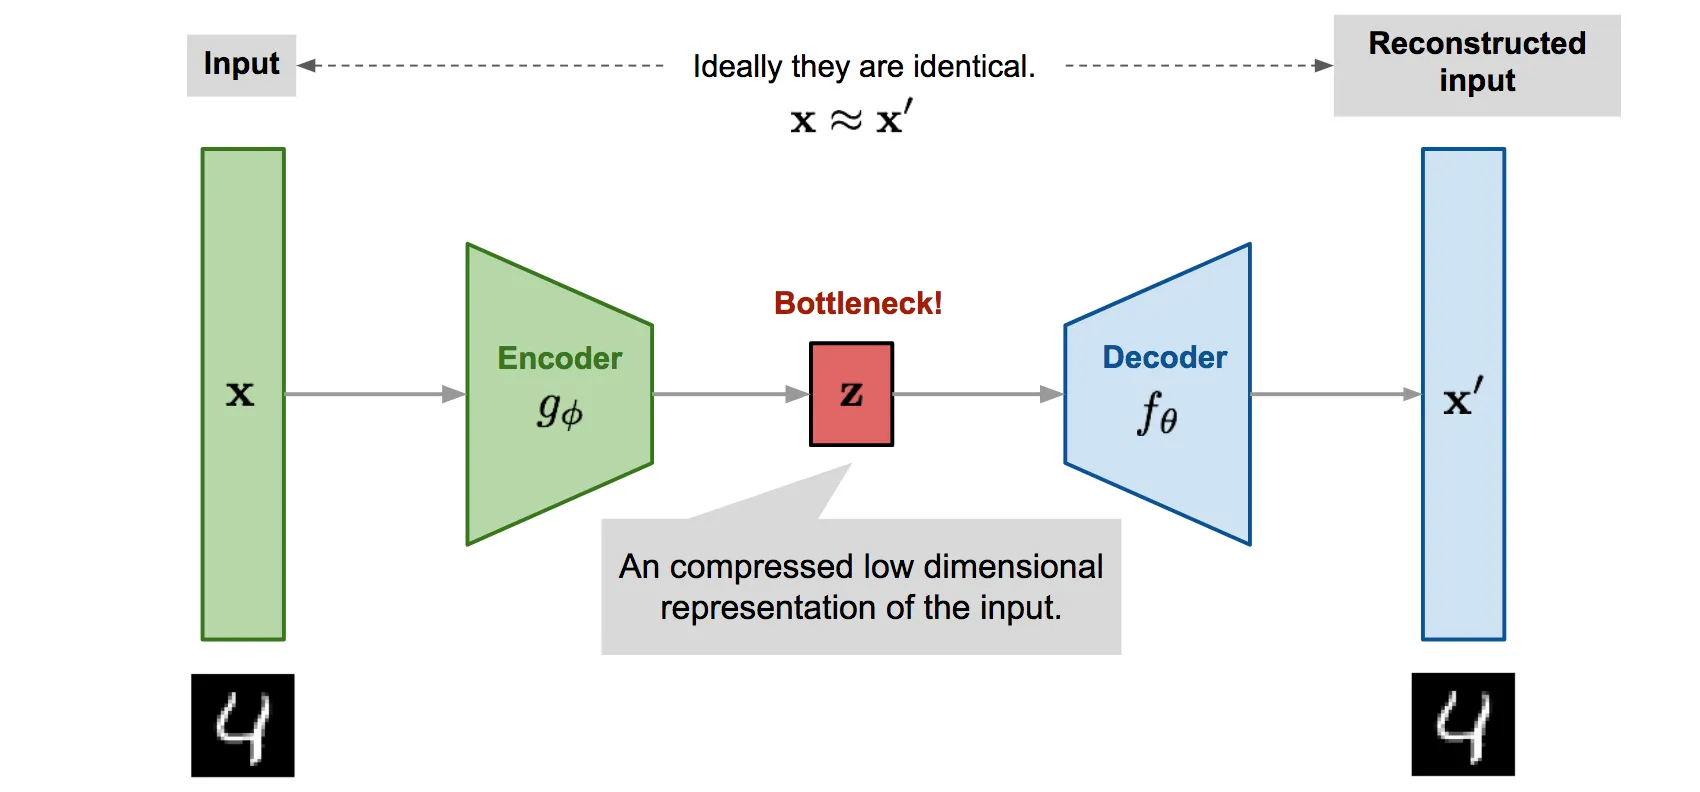

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [ ]:
def build_encoder(input_shape, latent_dim):
    encoder_input = layers.Input(shape=input_shape, name="encoder_input")
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Flatten()(x)
    bottleneck = layers.Dense(latent_dim, activation="relu", name="bottleneck")(x)
    return Model(encoder_input, bottleneck, name="encoder")

In [ ]:
def build_decoder(latent_dim, output_shape):
    decoder_input = layers.Input(shape=(latent_dim,), name="decoder_input")
    x = layers.Dense(2 * 2 * 256, activation="relu")(decoder_input)
    x = layers.Reshape((2, 2, 256))(x)
    x = layers.Conv2DTranspose(256, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoder_output = layers.Conv2DTranspose(output_shape[-1], (3, 3), activation="sigmoid", padding="same", name="decoder_output")(x)
    return Model(decoder_input, decoder_output, name="decoder")

In [ ]:
def build_autoencoder(input_shape, latent_dim):
    encoder = build_encoder(input_shape, latent_dim)
    decoder = build_decoder(latent_dim, input_shape)

    autoencoder_input = layers.Input(shape=input_shape, name="autoencoder_input")
    encoded = encoder(autoencoder_input)
    decoded = decoder(encoded)

    autoencoder = Model(autoencoder_input, decoded, name="autoencoder")
    return autoencoder, encoder, decoder

In [ ]:
# Define input shape and latent space dimension
input_shape = (32, 32, 3)
latent_dim = 128

# Build the autoencoder
autoencoder, encoder, decoder = build_autoencoder(input_shape, latent_dim)

autoencoder.compile(optimizer="adam", loss="mse")

# Display the model architecture
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)       │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 128)                 │         519,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 32, 32, 3)           │       1,110,339 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,955 (6.22 MB)

 Trainable params: 1,629,955 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Dataset (CIFAR-10): Source: https://www.kaggle.com/c/cifar-10/
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


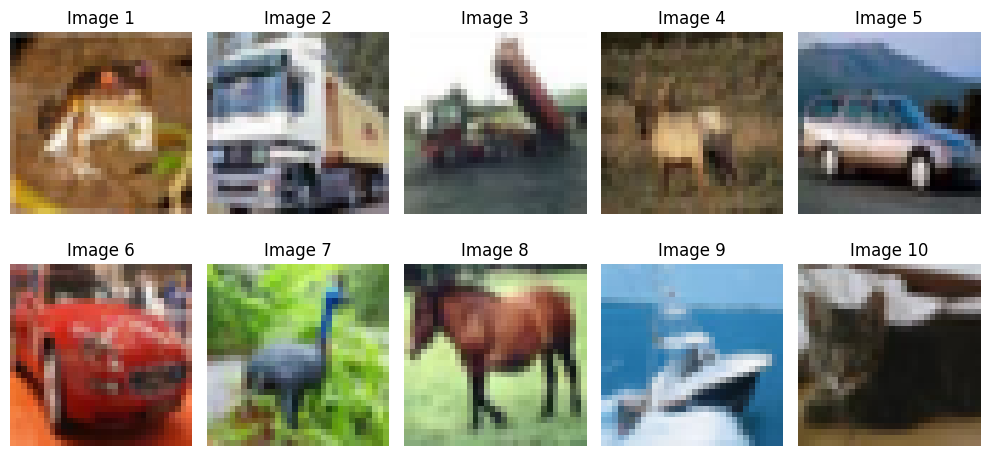

In [ ]:
# Visualize a few images from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Image {i + 1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=128,
                          validation_data=(x_test, x_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - loss: 0.0385 - val_loss: 0.0196
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - loss: 0.0186 - val_loss: 0.0165
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - loss: 0.0156 - val_loss: 0.0144
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - loss: 0.0140 - val_loss: 0.0130
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - loss: 0.0130 - val_loss: 0.0125
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - loss: 0.0122 - val_loss: 0.0117
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - loss: 0.0116 - val_loss: 0.0115
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - loss: 0.0112 - val_loss: 0.0108
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 0.0108 - val_loss: 0.0110
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 0.0104 - val_loss: 0.0105
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - loss: 0.0101 - val_loss: 0.0105
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Test with a few samples
n_samples = 5
samples = x_test[:n_samples]
encoded_imgs = encoder.predict(samples)
decoded_imgs = autoencoder.predict(samples)

# Plot original, encoded (bottleneck), and reconstructed images
plt.figure(figsize=(10, 4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

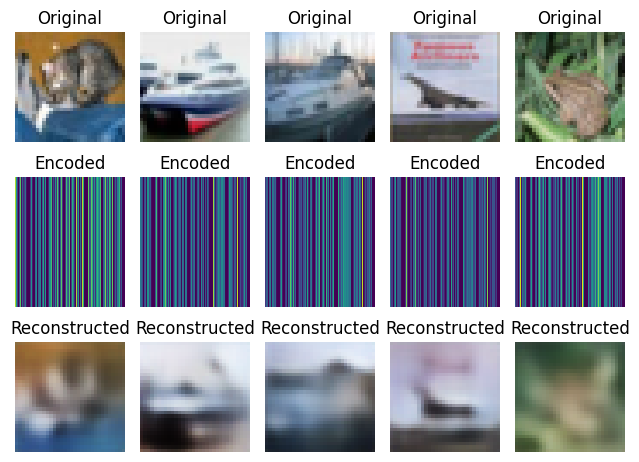

In [ ]:
for i in range(n_samples):
    # Original image
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(samples[i])
    plt.title("Original")
    plt.axis("off")

    # Encoded image (visualizing bottleneck as a single vector)
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(encoded_imgs[i].reshape(1, -1), aspect="auto", cmap="viridis")
    plt.title("Encoded")
    plt.axis("off")

    # Reconstructed image
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()

# 2. Generative Adversarial Networks

Generative Adversarial Networks (GANs) are a class of deep learning models used for generating new data that is similar to a given dataset. GANs consist of two neural networks: the generator and the discriminator. These networks are trained simultaneously in a process known as adversarial training.

# Components of GANs:

1. Generator: This network takes random noise as input and generates fake data (e.g., images, text) that mimics the real data distribution. Its goal is to produce data that looks as realistic as possible.
2. Discriminator: This network is a binary classifier that takes either real data (from the training set) or fake data (from the generator) as input and tries to distinguish between the two. Its goal is to accurately classify data as either "real" or "fake."


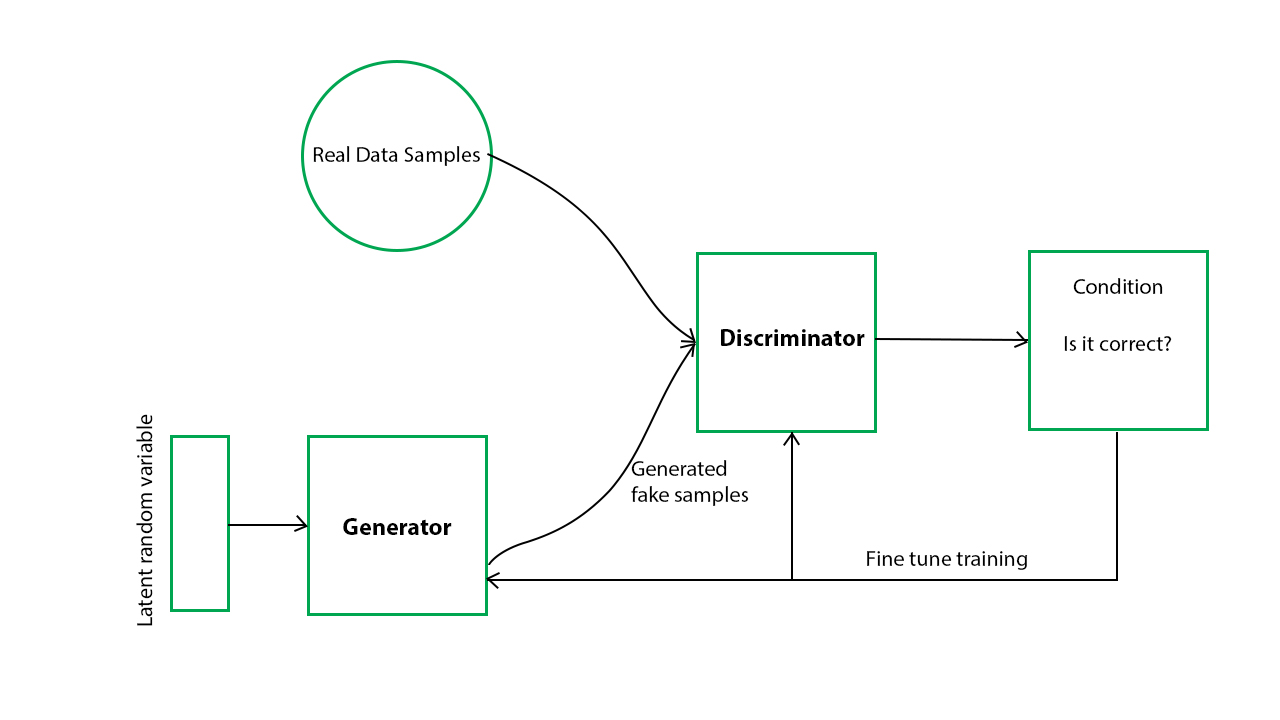

Code example: https://www.tensorflow.org/tutorials/generative/dcgan


# Applications of Generative models include:

1. Image generation and synthesis.
2. Image-to-image translation (e.g., style transfer, colorization).
3. Super-resolution (enhancing image resolution).
1. Image inpainting (filling in missing parts of an image).
1. 3D shape generation and reconstruction.
1. Facial expression and pose synthesis.
1. Data augmentation for training models.
1. Scene generation from text descriptions.
